**классификатор текстов**

SnowballStemmer+TfidfVectorizer

_Евгений Борисов <esborisov@sevsu.ru>_

---

Введение в анализ текстовой информации с помощью Python и методов машинного обучения.   
https://habr.com/ru/post/205360/

In [1]:
import pandas as pd
from tqdm.auto import tqdm

pd.options.display.precision = 2 
pd.options.display.max_colwidth = 200 
tqdm.pandas()

## загрузка данных 

датасет Lenta.Ru-News    
https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/

датасеты для примеров     
https://disk.yandex.ru/d/3_WAa7SgrQYBzw    

датасет  news.pkl.gz   
https://disk.yandex.ru/d/8_T_XITkZ4gKAw

In [2]:
# загружаем тексты
data = pd.read_pickle('news.pkl.gz')
display( len(data) )
display( data.sample(2) )

3196

,text,tag
2093,"В центральной встрече 18-го тура чемпионата Украины между ""Динамо"" и ""Шахтером"" не обошлось без скандала. Во втором тайме матча, завершившегося победой ""горняков"" со счетом 4:3, на поле произошла ...",sport
1254,"Протоиерей Игорь Коростелев: ""Не могу понять священников, которые покупают очень дорогие машины""\n\n29 ноября 2016 в 17:20\n\nЛюбовь Касперович, AUTO.TUT.BY / Фото: Дарья Бурякина\n\n— Благословит...",auto


## токенайзер со стемингом и очисткой

In [ ]:
# !pip install natasha 

In [ ]:
# import nltk
# nltk.download('stopwords')

In [3]:
# токенайзер Natasha

import re
from razdel import tokenize
from nltk.corpus import stopwords as nltk_stopwords

stopwords = set(nltk_stopwords.words('russian'))

def tokenizer(text,stopwords=stopwords):
    return [
            t.text for t in tokenize( # разбиваем текст на слова
                re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
            ) 
            if not (
               False
               or (t.text in stopwords) # выкидываем предлоги, союзы и т.п.    
               or re.match(r'^[^a-zA-ZЁёА-я]+$', t.text) # выкидываем токены не содержащие букв
               or re.match(r'^(\w)\1+$', t.text)  # выкидываем токены из одного повторяющегося символа
               or re.match(r'^[^a-zA-ZЁёА-я].*$', t.text)  # выкидываем токены начинающиеся не с буквы
            )
        ] 

In [ ]:
# токенайзер cо стеммером

## NLTK package manager
# import nltk
# nltk.download()

# from nltk.tokenize import word_tokenize as nltk_tokenize_word
# from nltk.stem.snowball import SnowballStemmer
# from nltk.corpus import stopwords as nltk_stopwords
# import re

# stemmer = SnowballStemmer('russian')
# stopwords = set(nltk_stopwords.words('russian'))

# def tokenizer(text,stemmer=stemmer,stopwords=stopwords):
#     return [
#             stemmer.stem(t) # выполняем стеминг
#             for t in nltk_tokenize_word( # разбиваем текст на слова
#                 re.sub(r'</?[a-z]+>',' ',text), # удаляем xml tag 
#                 language='russian'
#             ) 
#             if not (
#                (len(t)<3) # выкидываем очень короткие слова
#                or re.match(r'^[^a-zA-ZЁёА-я]+$', t) # выкидываем токены не содержащие букв
#                or re.match(r'^(\w)\1+$', t)  # выкидываем токены из одного повторяющегося символа
#                or re.match(r'^[^a-zA-ZЁёА-я].*$', t)  # выкидываем токены начинающиеся не с буквы
#                or (t in stopwords) # выкидываем предлоги, союзы и т.п.    
#             )
#         ] 
    
# # data['text'].progress_apply(tokenizer)

In [ ]:
# # токенайзер с лемматизацией

# from natasha import Doc
# from natasha import Segmenter
# from natasha import MorphVocab
# from natasha import NewsEmbedding
# from natasha import NewsMorphTagger

# from nltk.corpus import stopwords as nltk_stopwords
# stopwords = set(nltk_stopwords.words('russian'))

# seg = Segmenter() # базовый токенизатор
# # морфологический анализ
# tagger = NewsMorphTagger( NewsEmbedding() )
# lvoc = MorphVocab() # лемматизатор

# def tokenizer(text,seg=seg, tagger=tagger, lvoc=lvoc, stopwords=stopwords):
#     doc = Doc(text)
#     doc.segment(seg)
#     doc.tag_morph(tagger)
#     for t in doc.tokens: t.lemmatize(lvoc)
        
#     return [
#         t.lemma for t in doc.tokens
#         if not (
#              False
#             or (t.lemma in stopwords) # выкидываем предлоги, союзы и т.п.  
#             or re.match(r'^[^a-zA-ZЁёА-я]+$', t.lemma) # выкидываем токены не содержащие букв
#             or re.match(r'^(\w)\1+$', t.lemma)  # выкидываем токены из одного повторяющегося символа
#             or re.match(r'^[^a-zA-ZЁёА-я].*$', t.lemma)  # выкидываем токены начинающиеся не с буквы
#         )
#     ]

## выполняем частотный анализ

In [5]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer?

In [6]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

# использования токенайзера вместе с векторайзером
tf_model = TfidfVectorizer(
        min_df=.001, # выкидываем очень редкие слова
        max_df=.10, # выкидываем очень частые слова
        use_idf=False, # не используем обратную частоту
        norm='l2', # нормируем TF
        tokenizer=tokenizer, # ф-ция токенайзер
        token_pattern=None, # отключаем дефолтный токенайзер
    )

data_tf = tf_model.fit_transform( data['text'] )

CPU times: user 4.16 s, sys: 5.29 ms, total: 4.17 s
Wall time: 4.17 s


In [7]:
display( data_tf.shape )

(3196, 19991)

In [8]:
vcb1 = sorted(tf_model.vocabulary_)
display(len(vcb1))
display( pd.Series(vcb1).sample(30) )

19991

12811             празднования
15679                    сидни
7414                   летучей
19319                   черном
19075                хорватией
1138                барановичи
5110                занимались
13088               прекрасный
16206                совершили
13241               пригласить
19012                       хк
17783             транспортным
19812                   этноса
17712                тоттенхэм
15071               российских
7518                   лишится
7521                   лишнего
1794            вегетарианские
856                аналогичный
5539                      иван
14135                  путевки
12241                    полям
4329     дорожно-транспортного
10183             определенном
18662                    фанат
6719              коммунальной
11312                  печенье
19757           энергетической
3251                       гол
6624                    колесо
dtype: object

## формируем датасеты

In [9]:
labels = { t:i for i,t in enumerate(sorted(set(data['tag']))) }
display( labels )

{'auto': 0,
 'culture': 1,
 'economics': 2,
 'health': 3,
 'incident': 4,
 'politics': 5,
 'realty': 6,
 'reclama': 7,
 'science': 8,
 'social': 9,
 'sport': 10,
 'tech': 11,
 'woman': 12}

In [10]:
y = data['tag'].map(labels).values
display( y )

array([5, 1, 1, ..., 8, 5, 9])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( 
    data_tf, y, test_size=0.3, random_state=326 )
display( X_train.shape, y_train.shape, X_test.shape, y_test.shape )

(2237, 19991)

(2237,)

(959, 19991)

(959,)

## обучаем классификатор

In [12]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(loss='hinge',max_iter=1000, tol=0.19).fit(X_train,y_train)

## тестируем

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [14]:
# доля правильных ответов на учебном наборе
o = model.predict(X_train)
display( accuracy_score(y_train,o) )

0.9991059454626732

In [15]:
# доля правильных ответов на тестовом наборе
o = model.predict(X_test)
display(  accuracy_score(y_test,o) )

0.8654848800834203

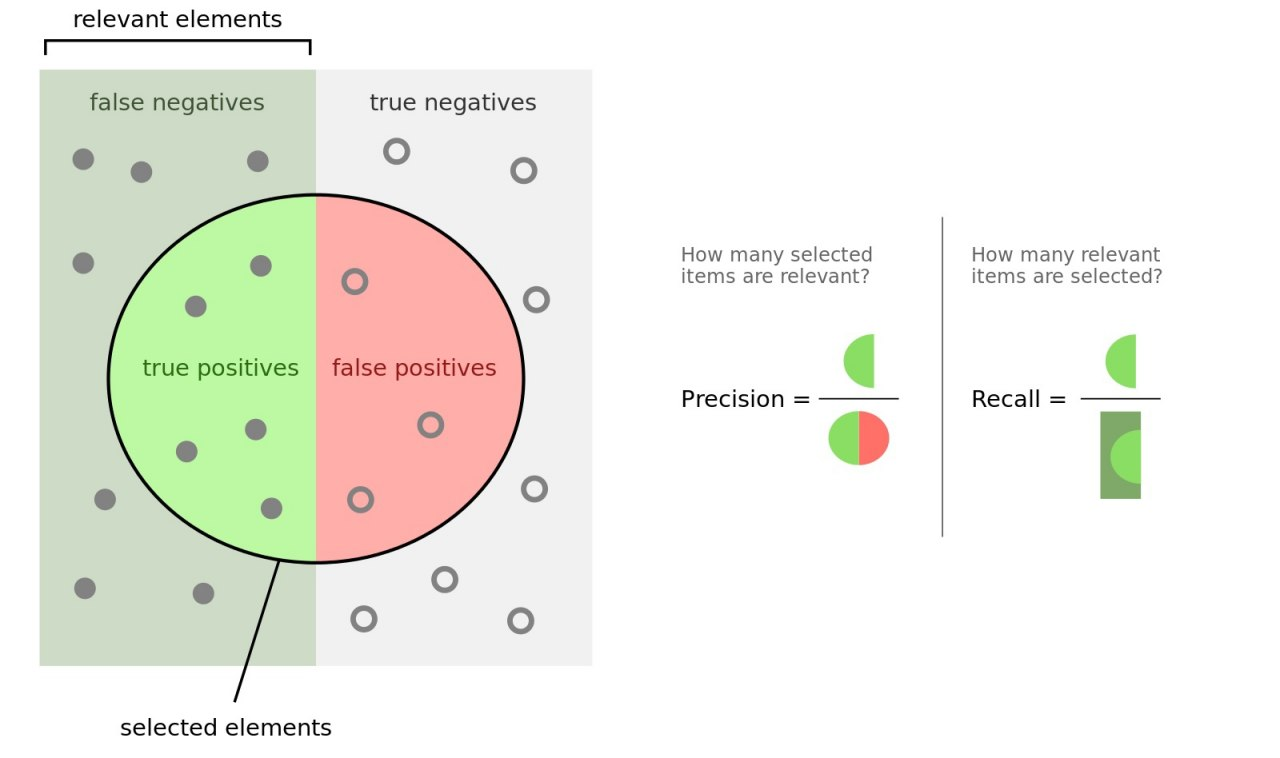

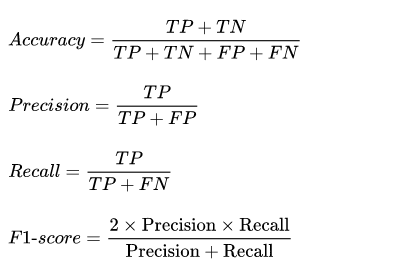

In [16]:
print( classification_report( y_test, o, target_names=sorted(labels.keys()) ) )

              precision    recall  f1-score   support

        auto       0.95      0.89      0.92        87
     culture       0.79      0.89      0.84       101
   economics       0.80      0.83      0.81        76
      health       0.85      0.71      0.77        31
    incident       0.88      0.92      0.90       123
    politics       0.87      0.95      0.91       177
      realty       0.83      0.71      0.77        21
     reclama       1.00      0.71      0.83        17
     science       0.88      1.00      0.94        68
      social       0.58      0.34      0.43        44
       sport       0.98      0.98      0.98       118
        tech       0.82      0.73      0.77        89
       woman       0.86      0.86      0.86         7

    accuracy                           0.87       959
   macro avg       0.85      0.81      0.82       959
weighted avg       0.86      0.87      0.86       959



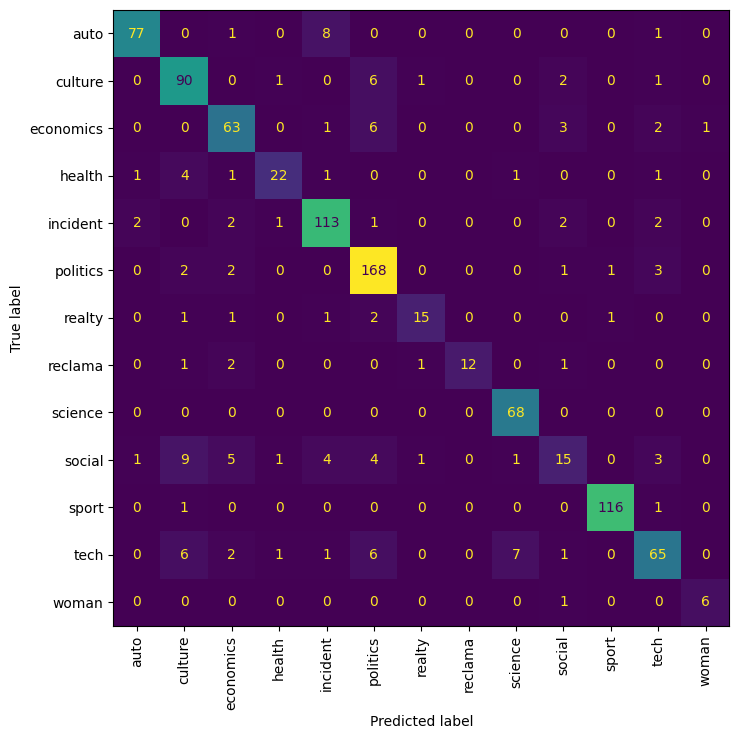

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(y_test,o), 
    display_labels=sorted(labels.keys()),
)
disp.plot(ax=ax, xticks_rotation='vertical', include_values=True, cmap='viridis',  colorbar=False,)
plt.show()

---

In [18]:
data['predict'] = pd.Series( model.predict(data_tf) ).map( { labels[k]:k for k in labels } )

In [19]:
display( data.query('tag!=predict') )

,text,tag,predict
0,"В Саудовской Аравии сняли первый антитеррористический мультфильм -\nтрехминутную ленту ""Внимание!"". ""Внимание!"" отражает точку зрения мирового\nсообщества на войну, развязанную терроризмом, и поэт...",politics,culture
39,"Баскетбол : Кириленко опроверг прогнозы врачей Главная звезда российского\nбаскетбола Андрей Кириленко вернулся в строй после двухнедельного\nотсутствия, связанного с травмой правой лодыжки. О том...",sport,tech
45,"Британские ученые доказали: в плохой учебе виноват рост После терапии с\nиспользованием факторов роста отмечалось не только ускорение роста, но\nи улучшение IQ.Следовательно, интеллектуальные спос...",health,economics
56,"Боль в груди? А ты поди - роди! Поэтому мы решили помочь мамам восстановиться\nсамим и научиться ухаживать за новорожденным.Роддома отличаются очень\nжесткими кроватями, которые ""удваивают"" ощущения.",health,culture
79,Вышла финальная версия Firefox 1.5 Анонсирован выход релиза Firefox 1.5,tech,culture
...,...,...,...
3158,"Центр рыночной информации АПК Закон об охоте, учитывающий интересы коренных\nмалочисленных народов Севера, вступит в силу с 1 января 2011 года Проект\nфедерального закона ""О внесении изменений в Ф...",social,politics
3169,"22.07.2010. Телекомпания ""Северный город"" Закон об охоте, учитывающий\nинтересы КМНС, вступит в силу с 1 январябудущего года. URA.RU - Российское\nинформационное агентство Задание Комаровой выпол...",politics,economics
3173,"Все новости Красноярска (Yarsk.Ru) Финансирование программы ?Коренные\nмалочисленные народы Севера? увеличится на 7 миллионов рублей 15 июля\nсостоялось заседание Правительства Красноярского края,...",economics,politics
3178,"Организации Новости-online (Регион-Информ-Москва) ""Городские новости""\n(Красноярск) 16.07.10, ""В чуме ждать рассвета"", Михаил Кожевников\nКраевое правительство одобрило ""Концепцию устойчивого разв...",social,politics
